In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as st
from scipy import stats
from pylab import *

In [40]:

data = {'x' : pd.Series([1, 2, 3,4,5,6,7,8], index=[1, 2, 3,4,5,6,7,8]),
       'y' : pd.Series([2,4,3,6,5,7,6,8], index=[1, 2, 3,4,5,6,7,8])}

df = pd.DataFrame(data)
df

,x,y
1,1,2
2,2,4
3,3,3
4,4,6
5,5,5
6,6,7
7,7,6
8,8,8


In [41]:
X = df['x']
X

1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
Name: x, dtype: int64

In [42]:
Y = df['y']
Y

1    2
2    4
3    3
4    6
5    5
6    7
7    6
8    8
Name: y, dtype: int64

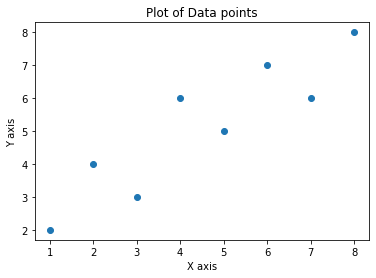

In [43]:
plt.scatter(X,Y)
plt.title('Plot of Data points')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

## We have the same set of plot points as previously observed in the [Least Squares linear regression](https://nbviewer.jupyter.org/github/NicJC/wyrfraym/blob/27252ec121af5c91fa578e45f3ec3ed721744e05/content/posts/ML%20LSE/Least%20Squares%20linear%20regression.ipynb)

Here we are going to work out the best fit line, but we are going to approach the calculation from the Ordinary Least Squares method.

We will use the equation : 
    $$\hat y = \beta_0 + \beta_i x$$

#### By using Ordinary least squares regression, we can find the best fitting line by minimizing the squared errors.
 
OLS minimizes the sum of the squared vertical distances - the residuals as shown in the plot below.

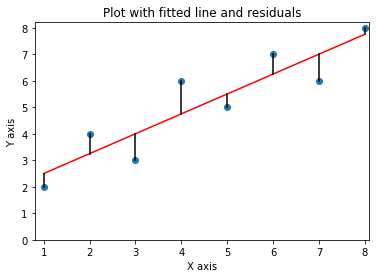

In [44]:
x = np.array([1,2,3,4,5,6,7,8])
y = np.array([2,4,3,6,5,7,6,8])

k,d = polyfit(x,y,1)
yfit = k*x+d

scatter(x,y)

plot(x, yfit, 'r')
for j in range(len(x)):
    plot([x[j], x[j]], [yfit[j], y[j]], 'k')
xlim((0.8, 8.1))
ylim((0, 8.2))
xlabel('X axis')
ylabel('Y axis')
title('Plot with fitted line and residuals')

show()

$$\hat y = \beta_0 + \beta_i x $$

$\hat y$ is the predicted value of $y$ for a given $x$ value.

$x_i$ is the value of the $ith$ independent variable.  

$y_i$ is the observed value of the dependent valiable for the $ith$ observation.
    
$\bar x$ is the mean of $x$ values.  

$\bar y$ is the mean of $y$ values
  
$\beta_0$ is the intercept where the line croses the $y$ intercept.


In [45]:
xbar = np.mean(X)
xbar

4.5

In [46]:
ybar = np.mean(Y)
ybar

5.125

$b_1$ is the slope of the fitted line.

$b_1 = \frac{\sum (x_i - \bar x)(y_i - \bar y)}{\sum (x_i - \bar x)^{2}}$, which can be worked out by hand as below:

In [47]:
data = {"X"                    :['1', '2', '3','4','5','6','7','8'],
       "Y"                     :['2','4','3','6','5','7','6','8'],
        "X-xbar"               :['-3.5','-2.5','-1.5','-0.5','0.5','1.5','2.5','3.5'],
        "Y-ybar"               :['-3.125','-1.125','-2.125','0.875','-0.125','1.875','0.875','2.875'],
        "  X-xbar)x(Y-ybar)  " :['10.9375','2.8125','3.1875','-0.4375','-0.0625','2.8125','2.1875','10.0625'],
        "(X-xbar)^2"           :['12.25','6.25','2.25','0.25','0.25','2.25','6.25','12.25']}

df = pd.DataFrame(data,index=['X1', 'X2', 'X3','X4','X5','X6','X7','X8'])
print(df)

    X  Y X-xbar  Y-ybar   X-xbar)x(Y-ybar)   (X-xbar)^2
X1  1  2   -3.5  -3.125              10.9375      12.25
X2  2  4   -2.5  -1.125               2.8125       6.25
X3  3  3   -1.5  -2.125               3.1875       2.25
X4  4  6   -0.5   0.875              -0.4375       0.25
X5  5  5    0.5  -0.125              -0.0625       0.25
X6  6  7    1.5   1.875               2.8125       2.25
X7  7  6    2.5   0.875               2.1875       6.25
X8  8  8    3.5   2.875              10.0625      12.25


By taking the formula: $\sum(x_i-\bar x)\times(y_i-\bar y) = 31.5$, and $\sum(x_1 - \bar x)^{2} = 42$, we can get the slope of the line by dividing 31.5 by 42.

In [48]:
slope = 31.5 / 42
slope

0.75

The y intercept: $b_0 = \bar y - b_1 \bar x$

### By substitutuion: 

In [49]:
intercept = ybar - (slope * xbar)
intercept

1.75

## We can verify the results of the above by using some popular libraries:

In [50]:
data = {'x' : pd.Series([1, 2, 3,4,5,6,7,8], index=[1, 2, 3,4,5,6,7,8]),
       'y' : pd.Series([2,4,3,6,5,7,6,8], index=[1, 2, 3,4,5,6,7,8])}

df = pd.DataFrame(data)
df

,x,y
1,1,2
2,2,4
3,3,3
4,4,6
5,5,5
6,6,7
7,7,6
8,8,8


In [51]:
model = st.ols('Y ~ X', df)
model = model.fit()

In [52]:
model.params

Intercept    1.75
X            0.75
dtype: float64

In [53]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

print(slope)

0.75


In [54]:
print(intercept)

1.75
